In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv("stock_data.csv")

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df['Stock_1'].values.reshape(-1,1))

In [ ]:
training_data_len = int(len(scaled_data) * 0.8)

train_data = scaled_data[0:training_data_len, :]
x_train_temp, y_train = [], []

for i in range(60, len(train_data)):
    x_train_temp.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [ ]:
x_train, y_train = np.array(x_train_temp), np.array(y_train)
x_test, y_test = np.array(x_test_temp), np.array(y_test)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - loss: 0.3154 - val_loss: 0.0143
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0354 - val_loss: 0.0216
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0180 - val_loss: 0.0078
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0196 - val_loss: 0.0192
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0121 - val_loss: 0.0169
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0105 - val_loss: 0.0100
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0096 - val_loss: 0.0123
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0083 - val_loss: 0.0102
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.0084 - val_loss: 0.0077
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.0072 - val_loss: 0.0076


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
predictions = model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step


In [ ]:
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

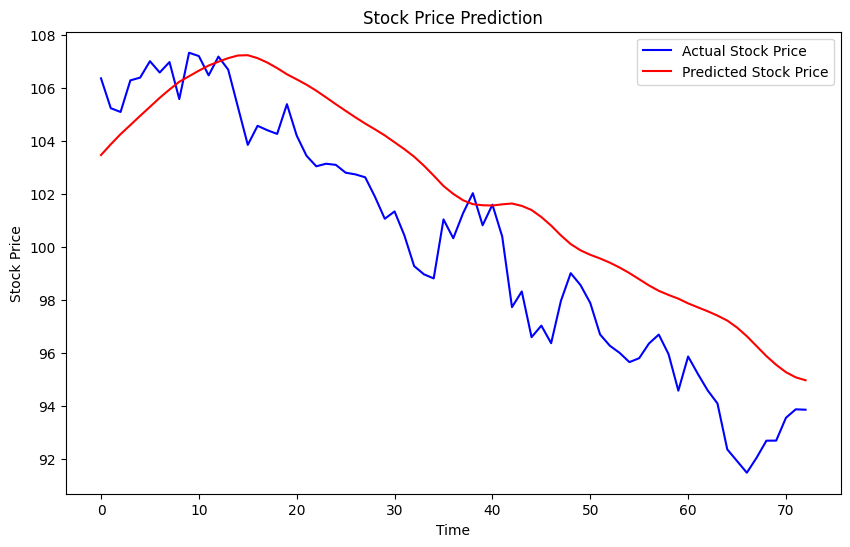

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()